In [2]:
import pandas as pd
import numpy as np
import pymysql

In [5]:
conn = pymysql.connect(host = 'codeborn-bi-db.cvv1o1yrngie.ap-northeast-2.rds.amazonaws.com',
                        port = 3306,
                        user = 'butterfree',
                        password = '4hHl68aS8UbJ',
                        db = 'codeborn')

sql_courses = "SELECT * FROM courses"
courses_data = pd.read_sql_query(sql_courses, conn)

sql_assignments = "SELECT * FROM assignments"
assignments_data = pd.read_sql_query(sql_assignments, conn)

sql_submissions = "SELECT * FROM submissions"
submissions_data = pd.read_sql_query(sql_submissions, conn)

sql_students = "SELECT * FROM students"
students_data = pd.read_sql_query(sql_students, conn)

/var/folders/vs/d7h80pg10h31n7bq9nk3bhxc0000gn/T/ipykernel_70176/3641877953.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  courses_data = pd.read_sql_query(sql_courses, conn)
/var/folders/vs/d7h80pg10h31n7bq9nk3bhxc0000gn/T/ipykernel_70176/3641877953.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  assignments_data = pd.read_sql_query(sql_assignments, conn)
/var/folders/vs/d7h80pg10h31n7bq9nk3bhxc0000gn/T/ipykernel_70176/3641877953.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  submissions_data = pd.read_sql_

KeyboardInterrupt: 

In [ ]:
# 1번 각 코스별로 제출 학생의 숫자와 숙제 평균 맞는 개수를 출력하시오
courses_id = pd.DataFrame(courses_data,columns=["course_id"])
courses_id = courses_id[courses_id.course_id != 123456]
courses_id = courses_id[courses_id.course_id != 1235324]

assignment_id = pd.DataFrame(assignments_data, columns=["course_id",  "assignment_id", "started_date", "ended_date"]) 
assignment_id = assignment_id[assignment_id.assignment_id != 1]
submission_id = pd.DataFrame(submissions_data, columns= ["submission_id", "assignment_id", "student_id"])
submission_id = submission_id[submission_id.student_id != 11]
courses_assignment= pd.merge(courses_id, assignment_id, on='course_id', how='left')

join_data = pd.merge(courses_assignment, submission_id, on='assignment_id', how= 'left') 
join_data_count =  join_data.groupby('course_id').agg({'assignment_id': 'nunique',
                                    'submission_id': 'count'
})
join_data_count

,assignment_id,submission_id
course_id,,
123456,0,0
123457,0,0
123458,0,0
123459,0,0
123460,0,0
123461,0,0
123462,0,0
123463,0,0
123464,0,0


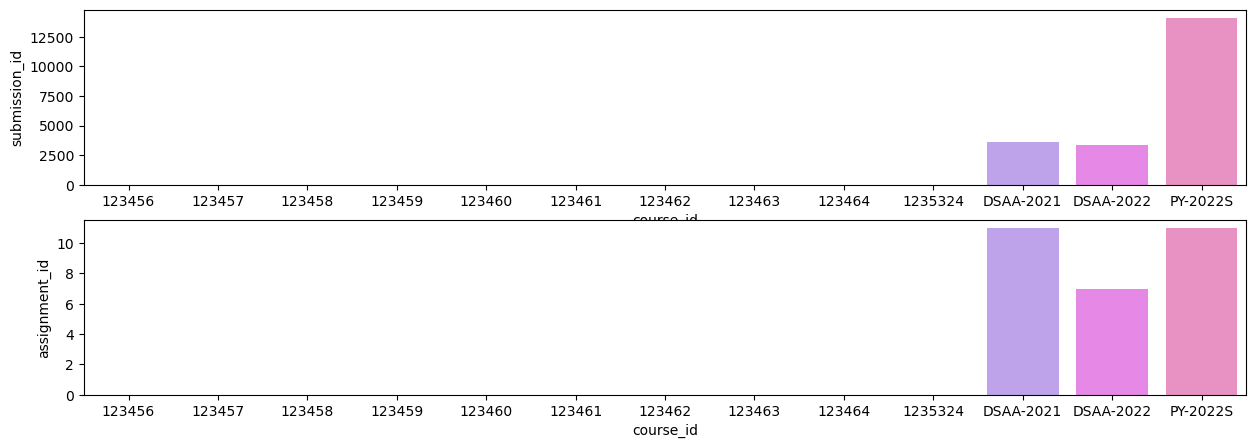

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

join_data_count = join_data_count.reset_index()
join_data_count
fig, ax = plt.subplots(nrows=2, figsize=(15,5))
sns.barplot(x = "course_id", y = "submission_id", data = join_data_count, ax = ax[0])
sns.barplot(x = "course_id", y = "assignment_id", data = join_data_count, ax = ax[1])
plt.show()

In [ ]:
# 2번 각 코스별, 숙제별로 숙제를 가장 빨리 제출한 학생의 아이디와 제출한 시간을 출력하시오
submission_df= pd.DataFrame(submissions_data, columns= ["submission_id", "assignment_id", "student_id", "submit_date"])
submission_df = submission_df[submission_df.assignment_id != 1]
submission_df = submission_df[submission_df.student_id != 11]

submitdate_df = pd.merge(courses_assignment, submission_df, on='assignment_id', how= 'left') 
submitdate_df = submitdate_df[submitdate_df.started_date <= submitdate_df.submit_date]
submitdate_df = submitdate_df[submitdate_df.ended_date >= submitdate_df.submit_date]


min_submit_date = submitdate_df.groupby(['course_id','assignment_id'])['submit_date'].min()
student_id_with_min_submit_date = submitdate_df.loc[submitdate_df.groupby(['course_id','assignment_id'])['submit_date'].idxmin()]['student_id'].reset_index()
result = pd.concat([min_submit_date.reset_index(), student_id_with_min_submit_date], axis=1)
min_submit_date

NameError: name 'submissions_data' is not defined

In [11]:
# 3번 각 코스별, 숙제별로 학생들이 숙제를 제출한 횟수를 출력하시오
submission_id_df = pd.merge(courses_assignment, submission_df, on='assignment_id', how= 'left') 
submission_id_df = submission_id_df[submission_id_df.started_date <= submission_id_df.submit_date]
submission_id_df = submission_id_df[submission_id_df.ended_date >= submission_id_df.submit_date]

submit_count_df = submission_id_df.groupby(['course_id','assignment_id']).agg({
                            'submission_id': 'count'
                        })
submit_count_df

submission_id
course_id assignment_id               
DSAA-2021 2.0                      155
          3.0                       40
          6.0                      180
          8.0                      109
          10.0                      14
          11.0                      26
          13.0                     728
          14.0                     790
          16.0                     228
          18.0                     116
          22.0                       2
DSAA-2022 35.0                     392
          36.0                     119
          37.0                      90
          38.0                     265
          39.0                      84
          40.0                     538
          41.0                      67
PY-2022S  21.0                       7
          23.0                     735
          24.0                    1332
          25.0                    1326
          26.0                     775
          27.0                     435
          28.0                      10
          29.0                    1897
          30.0                    2074
          33.0                     677
          34.0                     804

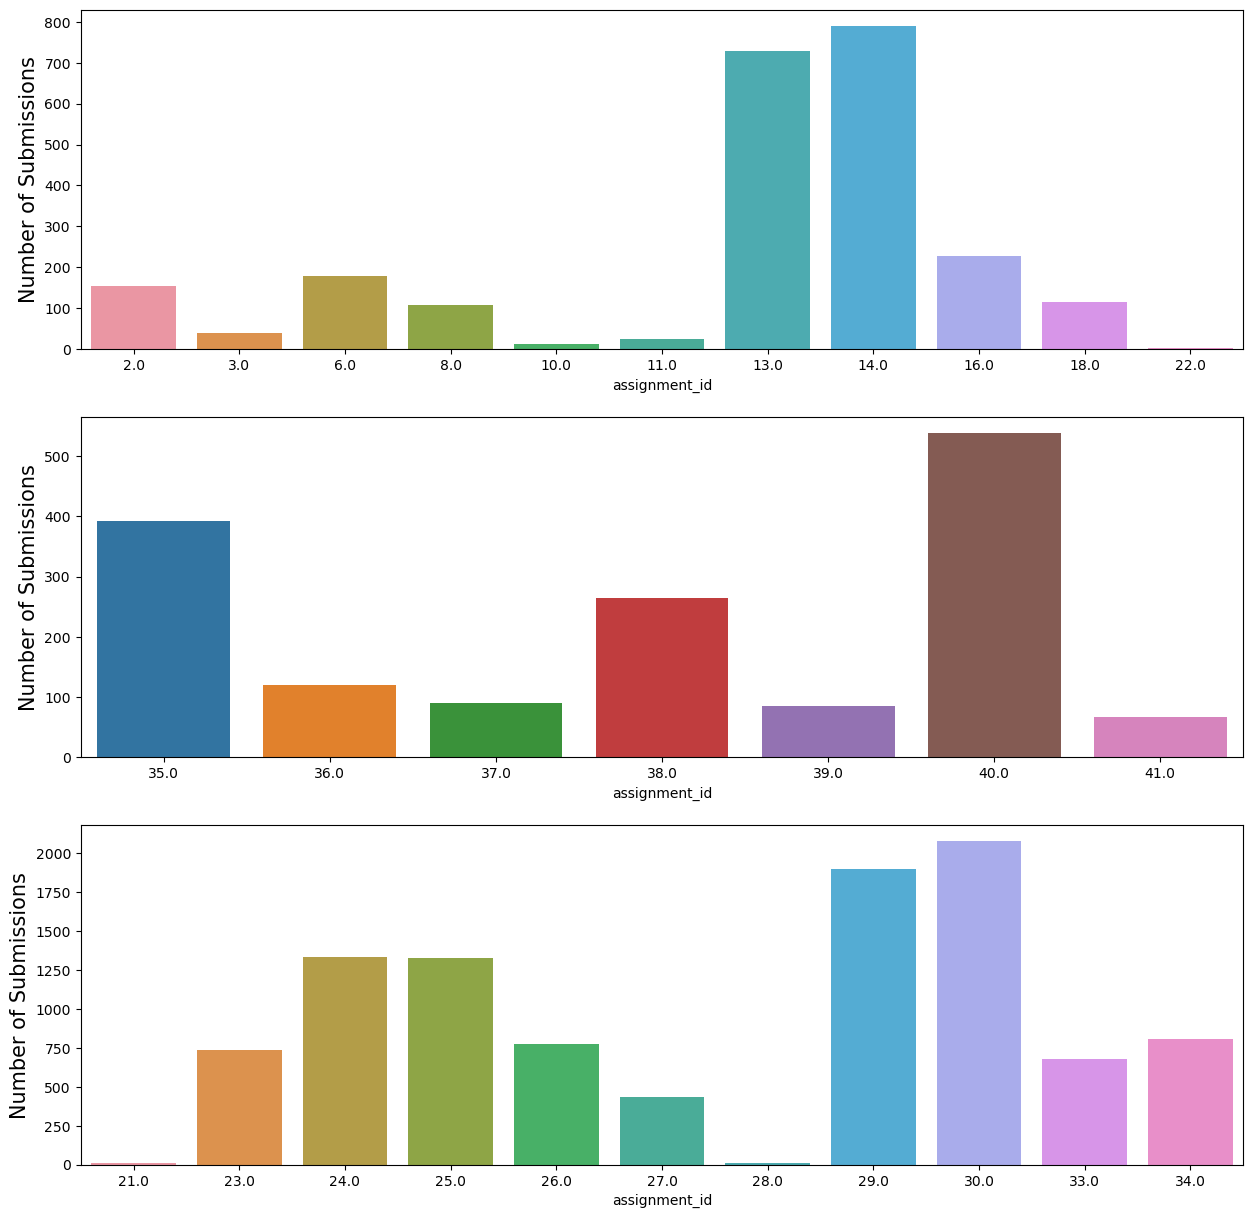

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
submit_count_df = submit_count_df.reset_index()
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.barplot(x = "assignment_id", y = "submission_id", data=submit_count_df[submit_count_df['course_id'] == "DSAA-2021"], ax = ax[0])
plt.ylabel('pH(0(very acidic) to 14(very basic))', fontsize=15)
sns.barplot(x = "assignment_id", y = "submission_id", data=submit_count_df[submit_count_df['course_id'] == "DSAA-2022"], ax = ax[1])
sns.barplot(x = "assignment_id", y = "submission_id", data=submit_count_df[submit_count_df['course_id'] == "PY-2022S"], ax = ax[2])
for i in range(3):
    ax[i].set_ylabel('Number of Submissions', fontsize=15)
plt.show()

In [13]:
#4번 각 코스별, 숙제별, 학생별로 처음 만점이 될 때까지의 제출 횟수를 출력하시오 
#단 만점이 아닌 경우에는 출력하지 않습니다.
submission_df= pd.DataFrame(submissions_data, columns= ["submission_id", "assignment_id", "student_id", "total_score"])
# courses_assignment = courses_assignment.drop(['started_date','ended_date'] , axis=1)
total_score_df = pd.merge(courses_assignment, submission_df, on = 'assignment_id', how='left')
total_score_df = total_score_df[total_score_df.total_score == 100]
# total_score_df 중복처리 ?
total_score_df = total_score_df.drop(["submission_id"],axis=1)
total_score_df = total_score_df.drop_duplicates()

#100점 여러개인것 고려/ 중복 처리는 ?

score_count = submission_df.groupby(["assignment_id","student_id"]).agg({
    "total_score": "count"
})
pd.merge(total_score_df, score_count, on= "student_id",how= 'right')



,course_id,assignment_id,started_date,ended_date,student_id,total_score_x,total_score_y
0,NaN,NaN,NaT,NaT,1.0,NaN,1
1,NaN,NaN,NaT,NaT,2.0,NaN,1
2,DSAA-2021,2.0,2021-09-19,2021-09-25 00:00:00,11.0,100.0,0
3,DSAA-2021,6.0,2021-09-23,2021-09-24 00:00:00,11.0,100.0,0
4,DSAA-2021,8.0,2021-09-23,2021-09-24 00:00:00,11.0,100.0,0
...,...,...,...,...,...,...,...
5754,DSAA-2022,36.0,2022-09-16,2022-09-18 00:00:00,210.0,100.0,2
5755,DSAA-2022,38.0,2022-09-19,2022-09-23 00:00:00,210.0,100.0,2
5756,DSAA-2022,39.0,2022-10-05,2022-10-06 00:00:00,210.0,100.0,2
5757,DSAA-2022,40.0,2022-10-12,2022-10-25 23:59:59,210.0,100.0,2
